<a href="https://colab.research.google.com/github/lenagrumbach/diamond_price_prediction/blob/main/projeto_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
pd.options.display.float_format = '{:,.2f}'.format

##Import Data

In [2]:
from google.colab import drive
 
drive.mount('/drive')

Mounted at /drive


##Exploratory Data Analysis (EDA)

In [3]:
df_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/diamonds.csv')
display(df_diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.70,59.00,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56


In [4]:
df_rick_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/rick_diamonds.csv')
display(df_rick_diamonds)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.20,59.00,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.90,56.00,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.60,60.00,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.10,56.00,4.35,4.38,2.71


In [5]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,"48,940.00","48,940.00","48,940.00","48,940.00","48,940.00","48,940.00","48,940.00"
mean,0.80,61.75,57.45,"3,934.41",5.73,5.73,3.54
std,0.47,1.43,2.23,"3,989.33",1.12,1.15,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,"2,401.00",5.69,5.71,3.52
75%,1.04,62.50,59.00,"5,331.25",6.54,6.54,4.04
max,5.01,79.00,95.00,"18,823.00",10.74,58.90,31.80


In [7]:
df_rick_diamonds.describe()

,carat,depth,table,x,y,z
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.80,61.72,57.52,5.74,5.74,3.54
std,0.47,1.46,2.24,1.12,1.11,0.69
min,0.20,44.00,50.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,4.72,4.72,2.91
50%,0.71,61.80,57.00,5.71,5.72,3.53
75%,1.04,62.50,59.00,6.53,6.52,4.03
max,4.13,73.60,70.00,10.00,9.85,6.43


In [8]:
#sns.pairplot(df_diamonds,kind='reg',y_vars='price', x_vars=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])

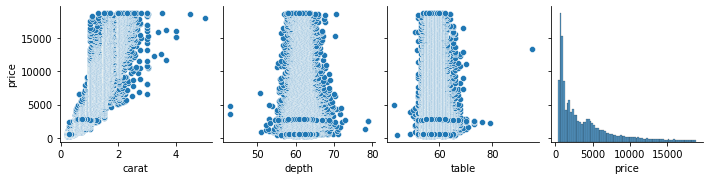

In [ ]:
#sns.pairplot(data = df_diamonds, y_vars='price', x_vars=['carat', 'depth', 'table', 'price'])

## Data Cleaning

**Create a new column to transform 'cut' into values ​​from 0 to 4**

Fair=0, Good=1, Very Good=2, Premium=3, Ideal=4

In [9]:
df_diamonds['cut_No'] = df_diamonds['cut'].replace('Ideal', 4, regex=False).replace('Premium', 3, regex=False).replace('Very Good', 2, regex=False).replace('Good', 1, regex=False).replace('Fair', 0, regex=False)

In [10]:
df_rick_diamonds['cut_No'] = df_rick_diamonds['cut'].replace('Ideal', 4, regex=False).replace('Premium', 3, regex=False).replace('Very Good', 2, regex=False).replace('Good', 1, regex=False).replace('Fair', 0, regex=False)

 **Create a new column to transform 'color' into values ​​from 0 to 6**
  
  J=0, I=1, H=2, G=3, F=4, E=5, D=6

In [11]:
df_diamonds['color_No'] = df_diamonds['color'].replace('D', 6, regex=False).replace('E', 5, regex=False).replace('F', 4, regex=False).replace('G', 3, regex=False).replace('H', 2, regex=False).replace('I', 1, regex=False).replace('J', 0, regex=False)

In [12]:
df_rick_diamonds['color_No'] = df_rick_diamonds['color'].replace('D', 6, regex=False).replace('E', 5, regex=False).replace('F', 4, regex=False).replace('G', 3, regex=False).replace('H', 2, regex=False).replace('I', 1, regex=False).replace('J', 0, regex=False)

**Create a new column to transform 'clarity' into values ​​from 0 to 7**

I1=0, SI2=1, SI1=2, VS2=3, VS1=4, VVS2=5, VVS1=6, IF=7

In [13]:
df_diamonds['clarity_No'] = df_diamonds['clarity'].replace('I1', 0, regex=False).replace('SI2', 1, regex=False).replace('SI1', 2, regex=False).replace('VS2', 3, regex=False).replace('VS1', 4, regex=False).replace('VVS2', 5, regex=False).replace('VVS1', 6, regex=False).replace('IF', 7, regex=False)

In [14]:
df_rick_diamonds['clarity_No'] = df_rick_diamonds['clarity'].replace('I1', 0, regex=False).replace('SI2', 1, regex=False).replace('SI1', 2, regex=False).replace('VS2', 3, regex=False).replace('VS1', 4, regex=False).replace('VVS2', 5, regex=False).replace('VVS1', 6, regex=False).replace('IF', 7, regex=False)

In [15]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       48940 non-null  float64
 1   cut         48940 non-null  object 
 2   color       48940 non-null  object 
 3   clarity     48940 non-null  object 
 4   depth       48940 non-null  float64
 5   table       48940 non-null  float64
 6   price       48940 non-null  int64  
 7   x           48940 non-null  float64
 8   y           48940 non-null  float64
 9   z           48940 non-null  float64
 10  cut_No      48940 non-null  int64  
 11  color_No    48940 non-null  int64  
 12  clarity_No  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


In [16]:
df_rick_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       5000 non-null   float64
 1   cut         5000 non-null   object 
 2   color       5000 non-null   object 
 3   clarity     5000 non-null   object 
 4   depth       5000 non-null   float64
 5   table       5000 non-null   float64
 6   x           5000 non-null   float64
 7   y           5000 non-null   float64
 8   z           5000 non-null   float64
 9   cut_No      5000 non-null   int64  
 10  color_No    5000 non-null   int64  
 11  clarity_No  5000 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 468.9+ KB


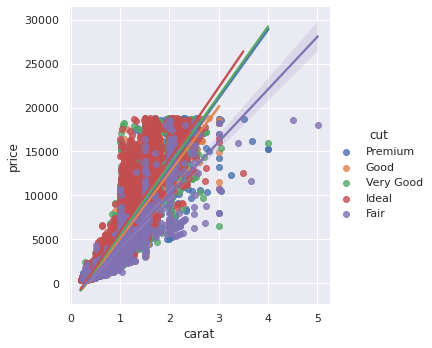

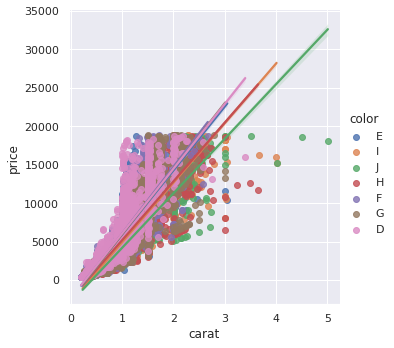

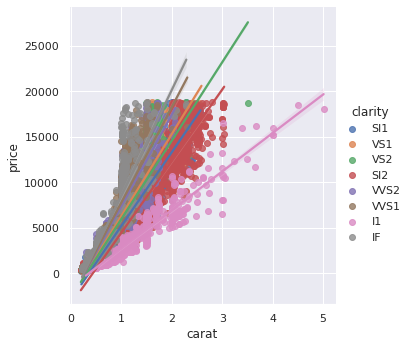

In [17]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lmplot(data=df_diamonds, x='carat', y='price', hue='cut')
sns.lmplot(data=df_diamonds, x='carat', y='price', hue='color')
sns.lmplot(data=df_diamonds, x='carat', y='price', hue='clarity')

In [18]:
mask_carat = df_diamonds['carat']>=0.63

In [19]:
df_diamonds = df_diamonds.loc[mask_carat]

##Linear Regression Model

In [20]:
df_diamonds.corr()['price']

carat         0.87
depth        -0.06
table        -0.01
price         1.00
x             0.86
y             0.79
z             0.83
cut_No        0.11
color_No     -0.08
clarity_No    0.16
Name: price, dtype: float64

In [21]:
X = df_diamonds[['carat', 'cut_No', 'color_No', 'clarity_No', 'x', 'y', 'z']]
y = df_diamonds['price']

In [22]:
modelo_diamonds = LinearRegression()

In [23]:
modelo_diamonds.fit(X,y)

LinearRegression()

In [24]:
modelo_diamonds.coef_
pd.DataFrame({'coefs':modelo_diamonds.coef_,'Columns':X.columns})

,coefs,Columns
0,"8,363.97",carat
1,195.22,cut_No
2,506.12,color_No
3,867.09,clarity_No
4,663.35,x
5,111.65,y
6,116.63,z


In [25]:
modelo_diamonds.intercept_

-12986.314694842127

In [26]:
modelo_diamonds.score(X,y)

0.8882621300895297

In [27]:
predict = modelo_diamonds.predict(df_rick_diamonds[['carat', 'cut_No', 'color_No', 'clarity_No', 'x', 'y', 'z']])

In [28]:
df_rick_diamonds['price_predicted'] = predict
df_rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_No,color_No,clarity_No,price_predicted
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89,2,2,1,"2,084.80"
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83,1,4,3,"-1,026.62"
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20,4,2,3,149.47
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09,4,3,4,"7,616.89"
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18,4,3,1,"16,387.21"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.20,59.00,4.25,4.30,2.66,2,6,1,"-2,573.29"
4996,0.51,Ideal,F,VVS2,61.90,56.00,5.09,5.14,3.16,4,4,5,"2,739.01"
4997,1.01,Very Good,F,SI1,60.60,60.00,6.37,6.43,3.88,2,4,2,"5,006.38"
4998,0.31,Ideal,F,VVS1,62.10,56.00,4.35,4.38,2.71,4,4,6,"1,305.09"


In [29]:
mask_low_values = df_rick_diamonds['price_predicted'] < df_diamonds['price'].min()
df_rick_diamonds.loc[mask_low_values,'price_predicted']=df_diamonds['price'].min()

##Save results

In [30]:
df_rick_diamonds.to_csv('diamonds_results.csv')

In [31]:
from google.colab import files
files.download('diamonds_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Version documentation

Prediction with historical average price, RMSE = 3980.713882502374

Prediction with historical price median, RMSE = 4255.533080942974

Prediction with simple linear regression model using the variable 'carat', RMSE = 1605.15175707362

Prediction with multiple linear regression model using variables 'carat' and 'cut_No', RMSE = 1578.5538450152076 (a negative value, -201.82, appeared in the column 'price_predicted')

**Results with low values correction**:

Prediction with multiple linear regression model using variables 'carat' and 'cut_No', RMSE = 1560.3875526620348

Prediction with multiple linear regression model using variables 'carat', 'cut_No' and 'color_No', RMSE = 1494.3832889738444

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No' and 'clarity_No', RMSE = 1226.9362366819055

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No' and 'x', RMSE = 1240.4099341776305

**Results after drop 18 rows with value 0 in columns 'x', 'y' or 'z' (18 out of 48940):**

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No' and 'x', RMSE = 1242.9898663407414

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No', 'x' and 'y', RMSE = 1242.601308595802

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No', 'x', 'y' and 'z', RMSE = 1243.017142456451

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No' and 'clarity_No', RMSE = 1227.0395614594963

**Drop the 18 rows didn't bring better results, so undo it.**

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No' and 'clarity_No', RMSE = 1226.9362366819055


**Filter on carat size (model applied to all df_rick_diamonds):**

**Carat greater than or equal to the median:**

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No', 'x', 'y' and 'z', RMSE = 1120.951108234914

Prediction with multiple linear regression model using variables 'carat', 'color_No', 'clarity_No', 'x', RMSE = 1119.051685118186

**Carat greater than or equal to 90% of the median:**

**Best model so far:** Prediction with multiple linear regression model using variables 'carat', 'x', 'y', 'z', 'cut_No', 'color_No', 'clarity_No', RMSE = 1115.2815460356976